<a href="https://colab.research.google.com/github/neon0047/TimeSeriesAnalysis/blob/main/Electricity_consumption_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/ec.csv',index_col = [0],parse_dates=True, squeeze = True)
df = df.dropna()

In [ ]:
df.head()

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.0,247.73,31
2016-02-01,292,1138.8,175.2,234.11,31
2016-03-01,130,507.0,78.0,123.85,29
2016-04-01,117,456.3,70.2,111.22,29
2016-05-01,136,530.4,81.6,118.37,29


In [ ]:
from fbprophet import Prophet

In [ ]:
df_final = df.reset_index()[['Bill_Date','Billed_amount','On_peak','Off_peak']].rename({'Bill_Date':'ds','Billed_amount':'y','On_peak':'On_peak','Off_peak':'Off_peak'}, axis = 'columns')

In [ ]:
df_final.head()

,ds,y,On_peak,Off_peak,month,month_bins
0,2016-01-01,247.73,365,1423.5,1,0
1,2016-02-01,234.11,292,1138.8,2,0
2,2016-03-01,123.85,130,507.0,3,0
3,2016-04-01,111.22,117,456.3,4,1
4,2016-05-01,118.37,136,530.4,5,1


In [ ]:
df_final[['y','y']].corr()

,y,y
y,1.0,1.0
y,1.0,1.0


In [ ]:
df_final['month'] = df_final['ds'].dt.month

In [ ]:
df_final['month_bins'] = pd.cut(df_final['month'], bins = 4, labels = False)

In [ ]:
df_final.head()

,ds,y,On_peak,Off_peak,month,month_bins
0,2016-01-01,247.73,365,1423.5,1,0
1,2016-02-01,234.11,292,1138.8,2,0
2,2016-03-01,123.85,130,507.0,3,0
3,2016-04-01,111.22,117,456.3,4,1
4,2016-05-01,118.37,136,530.4,5,1


In [ ]:
train = df_final[(df_final['ds'] >= '2016-01-01') & (df_final['ds'] <= '2019-12-01')]
test = df_final[(df_final['ds'] > '2019-12-01')]

In [ ]:
train.shape

(48, 6)

In [ ]:
test.shape

(5, 6)

In [ ]:
m = Prophet(interval_width = 0.95, yearly_seasonality=True)

In [ ]:
m.add_regressor('On_peak', standardize=False)
m.add_regressor('Off_peak', standardize=False)
m.add_regressor('month_bins', standardize=False, mode = 'multiplicative')

In [ ]:
m.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
m.params

{'beta': array([[-2.60030293e-01, -1.06075491e-01, -6.54563432e-02,
          2.43658339e-01, -1.91650608e-01,  6.28655701e-02,
          8.86214825e-02,  5.79901539e-02,  1.87139307e-01,
         -4.23736418e-02,  8.25767899e-02, -5.22755097e-02,
          1.85958126e-01, -3.73133258e-02,  8.40463988e-02,
         -5.89167999e-02, -1.33414657e-01, -1.54432031e-01,
          8.74399806e-02, -3.05672883e-01,  2.53378144e-04,
          3.74882929e-04, -6.08484907e-01]]),
 'delta': array([[ 2.13721524e-10,  2.69745549e-10, -2.53640235e-10,
          1.44891931e-10, -2.21334496e-10,  3.34941408e-10,
          2.53838226e-10,  6.87087997e-10,  1.83148387e-04,
          1.73439788e-04,  5.67134623e-04,  3.56650180e-04,
          3.27412143e-04,  1.48031393e-01,  4.84112750e-04,
          2.92629006e-04,  2.72216367e-04,  5.61143526e-04,
          2.44596714e-04,  1.93177472e-04,  7.72057594e-05,
          4.05917914e-05,  1.00253580e-06,  3.64950751e-10,
          4.32113347e-10]]),
 'k': ar

In [ ]:
future_df = m.make_future_dataframe(periods=0)
future_df['Off_peak'] = df_final['Off_peak']
future_df['On_peak'] = df_final['On_peak']
future_df['month_bins'] = df_final['month_bins']
future_df

,ds,Off_peak,On_peak,month_bins
0,2016-01-01,1423.5,365,0
1,2016-02-01,1138.8,292,0
2,2016-03-01,507.0,130,0
3,2016-04-01,456.3,117,1
4,2016-05-01,530.4,136,1
5,2016-06-01,245.7,63,1
6,2016-07-01,429.0,110,2
7,2016-08-01,686.4,176,2
8,2016-09-01,1392.3,357,2
9,2016-10-01,916.5,235,3


In [ ]:
forecast = m.predict(future_df)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
43,2019-08-01,306.840814,284.050662,329.929098
44,2019-09-01,403.656135,381.246728,427.160508
45,2019-10-01,251.371165,228.689490,275.587152
46,2019-11-01,147.985026,126.100056,171.296455
47,2019-12-01,146.628249,122.439608,170.077441


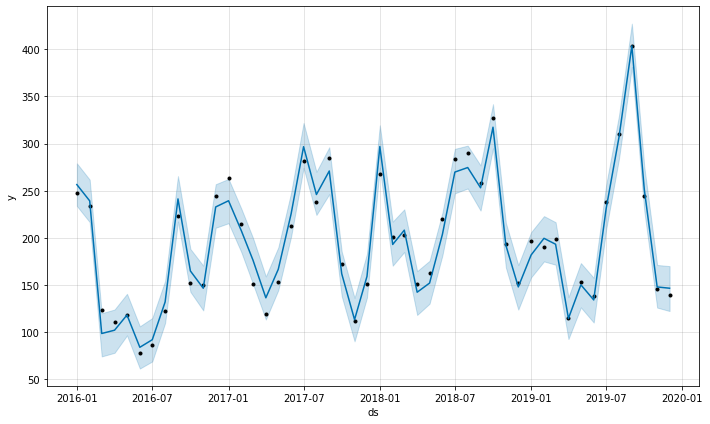

In [ ]:
m.plot(forecast);

In [ ]:
from fbprophet.diagnostics import cross_validation,  performance_metrics
cross_valdation_res = cross_validation( model = m, initial = '600 days', horizon = '300 days')
df_p = performance_metrics(cross_valdation_res)
df_p

INFO:fbprophet:Making 4 forecasts with cutoffs between 2017-11-11 00:00:00 and 2019-02-04 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 17.
INFO:fbprophet:n_changepoints greater than number of observations. Using 21.


,horizon,mse,rmse,mae,mape,mdape,coverage
0,25 days,505.475808,22.482789,17.111010,0.070498,0.069889,0.250
1,51 days,1900.071777,43.589813,35.704136,0.139825,0.123405,0.250
2,52 days,2684.823779,51.815285,48.426635,0.195584,0.198124,0.000
3,55 days,2426.211593,49.256589,43.091545,0.186441,0.198124,0.250
4,56 days,2232.743908,47.251920,36.274535,0.152618,0.163121,0.500
5,82 days,2816.246308,53.068317,40.520377,0.172752,0.179763,0.500
6,85 days,2770.813038,52.638513,37.509735,0.157725,0.149708,0.500
7,86 days,2783.474988,52.758648,39.155326,0.168168,0.168006,0.500
8,110 days,1439.280771,37.937854,23.857487,0.106916,0.054812,0.500
9,113 days,3173.020111,56.329567,33.285831,0.126144,0.054812,0.500


**MAPE: 0.1-0.3**

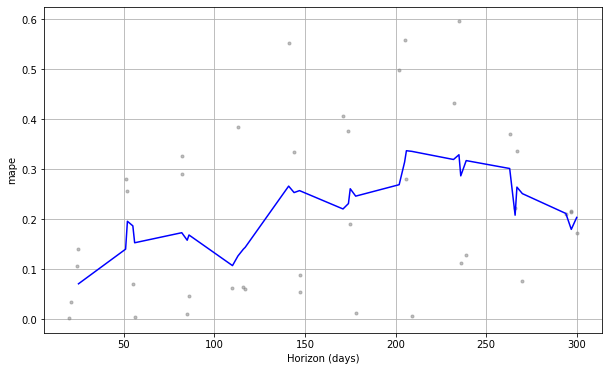

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(cross_valdation_res, metric='mape')